# Visualising relationships

By looking how one parameter or property depends on another one can determine if they are related to eaxch other or not. One assesses how much all datapoints follow a straight line (regression line). This is done using Pearsons number ($r$) ranging from -1 to 1 with 1 meaning all data are exactly on a straight line, 0 means there is no correlation between two parameter and -1 means they are all on a straight line but with a negative slope.

Seaborn provides ready made plots to show the regression line and a python statistic package can be used to caluculate $r$

In [9]:
# Import the basic numerical, plotting and database libraries
import numpy as np
import sqlite3 as sql
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr

In [10]:
con = sql.connect("csvweek8.db")    # Define filename for db (is created if it doesn't exist)
cur = con.cursor()                    # Open an SQL cursor


In [11]:
con = sql.connect("csvweek8_2.db")    # Define filename for db (is created if it doesn't exist)
cur = con.cursor()                    # Open an SQL cursor

# Using a multiline string we can write the required SQL statement
# The triple " is needed to start and stop the text we want in the
# Variable

CreateSQLString="""CREATE TABLE csvweek8_2(
    date   DATE      PRIMARY KEY,
    wind      DOUBLE,
    rain    DOUBLE,
    gme    DOUBLE
);
"""
# Now we send the text to the SQL database cursor
cur.execute(CreateSQLString)
# Finally we commit the change
con.commit()

OperationalError: table csvweek8_2 already exists

Let's grab the same dataset as in previous weeks (planet radius (pl_radj), orbital period (pl_orbper) and the stellar mass (st_mass))

In [12]:
data = pd.read_csv('daily_data.csv', skiprows=1)

attributes=['date', 'wind', 'rain', 'gme']
data=data.where(pd.notnull(data), '')                                       # Replace pandas “nan” missing data by “NULL”

# This enters data row by row in individual statements. There are more efficient ways to do this but this way is good enough for now
for row in data.itertuples(index=False, name=None):
    Query="INSERT into csvweek8_2 ("+", ".join(attributes)+") VALUES "+str(row)
    print("Entering Statement:\n"+Query)
    cur.execute(Query)
    con.commit()

Entering Statement:
INSERT into csvweek8_2 (date, wind, rain, gme) VALUES ('31/10/2022', 9.0, 9.6, 31.22)


IntegrityError: UNIQUE constraint failed: csvweek8_2.date

In [54]:
con = sql.connect("csvweek8_2.db")    # Define filename for db (is created if it doesn't exist)
cur = con.cursor()  

Query2="""SELECT Price_1, wind, rain FROM ethereum_evening INNER JOIN csvweek8_2 ON ethereum_evening.date_eth=csvweek8_2.date"""
# execute the query
cur.execute(Query2)
db_data = np.array(cur.fetchall(), dtype=float)                           # Execute query using pandas
Price1, wind, rain = db_data[:,0], db_data[:,1], db_data[:,2]

Query2="""SELECT date_eth FROM ethereum_evening INNER JOIN csvweek8_2 ON ethereum_evening.date_eth=csvweek8_2.date"""
# execute the query
cur.execute(Query2)
db_data = np.array(cur.fetchall(), dtype=datetime)   

date = db_data[:,0]
print(wind)
print(date)

[10.5  9.7 10.5 12.5  6.9 12.1  9.5  6.8  7.9  5.3  6.6 12.2 10.5 13.8
  7.8 13.6  6.3 11.1  9.   6.4  6.3 10.  11.4  8.9 12.3 11.6 11.2  9. ]
['2022-10-04' '2022-10-05' '2022-10-06' '2022-10-07' '2022-10-08'
 '2022-10-09' '2022-10-10' '2022-10-11' '2022-10-12' '2022-10-13'
 '2022-10-14' '2022-10-15' '2022-10-16' '2022-10-17' '2022-10-18'
 '2022-10-19' '2022-10-20' '2022-10-21' '2022-10-22' '2022-10-23'
 '2022-10-24' '2022-10-25' '2022-10-26' '2022-10-27' '2022-10-28'
 '2022-10-29' '2022-10-30' '2022-10-31']


In [55]:
# Define the seaborn plot style ("ticks" is good for science)
sns.set_theme(style="ticks")

# We also know that seaborn doesn't report r-values so lets write a function
# which can easily add them
def corrfunc(x, y, hue=None, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)     # Run the calculation on the x, y dataset given to the function
    ax = ax or plt.gca()      # Get the current plot axis the function is called for
    ax.annotate(f'r = {r:.2f}', xy=(.1, .08), xycoords=ax.transAxes)  # Add an annotation with the r-value

# So far we have plotted individual columns agains each other and used a third column as hue
# To explore all possible correlactions with each column to be plotted against each other
# seaborn requires a pandas dataframe. So lets build one:
#
# We also know that for astronomical, physical information logscale is very helpful
makeframe={'wind': (wind), 'rain': (rain), 'year': date, 'price' : Price1}

print(Price1)
print(makeframe)

[1340.43  1355.73  1358.36  1366.56  1362.85  1360.42  1354.53  1347.91
 1320.31  1326.6   1337.25  1319.88  1345.19  1348.685 1325.565 1325.505
 1309.195 1321.525 1332.505 1350.1   1365.24  1470.24  1544.95  1529.68
 1563.73  1626.34  1598.25  1581.85 ]
{'wind': array([10.5,  9.7, 10.5, 12.5,  6.9, 12.1,  9.5,  6.8,  7.9,  5.3,  6.6,
       12.2, 10.5, 13.8,  7.8, 13.6,  6.3, 11.1,  9. ,  6.4,  6.3, 10. ,
       11.4,  8.9, 12.3, 11.6, 11.2,  9. ]), 'rain': array([ 2.4,  9.8,  0.8,  2.3,  0.1,  2.9,  0. ,  0. ,  0. ,  0.4,  0.4,
        4.1,  2.3,  0. ,  0. , 31.4,  0.1,  9. ,  1.2, 10.3,  0.1,  3.4,
        5.3,  1.3,  5.1,  4.4,  0.1,  9.6]), 'year': array(['2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
       '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
       '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
       '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
       '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
       '2022-10-24', '2

    wind  rain        year     price
0   10.5   2.4  2022-10-04  1340.430
1    9.7   9.8  2022-10-05  1355.730
2   10.5   0.8  2022-10-06  1358.360
3   12.5   2.3  2022-10-07  1366.560
4    6.9   0.1  2022-10-08  1362.850
5   12.1   2.9  2022-10-09  1360.420
6    9.5   0.0  2022-10-10  1354.530
7    6.8   0.0  2022-10-11  1347.910
8    7.9   0.0  2022-10-12  1320.310
9    5.3   0.4  2022-10-13  1326.600
10   6.6   0.4  2022-10-14  1337.250
11  12.2   4.1  2022-10-15  1319.880
12  10.5   2.3  2022-10-16  1345.190
13  13.8   0.0  2022-10-17  1348.685
14   7.8   0.0  2022-10-18  1325.565
15  13.6  31.4  2022-10-19  1325.505
16   6.3   0.1  2022-10-20  1309.195
17  11.1   9.0  2022-10-21  1321.525
18   9.0   1.2  2022-10-22  1332.505
19   6.4  10.3  2022-10-23  1350.100
20   6.3   0.1  2022-10-24  1365.240
21  10.0   3.4  2022-10-25  1470.240
22  11.4   5.3  2022-10-26  1544.950
23   8.9   1.3  2022-10-27  1529.680
24  12.3   5.1  2022-10-28  1563.730
25  11.6   4.4  2022-10-29  1626.340
2

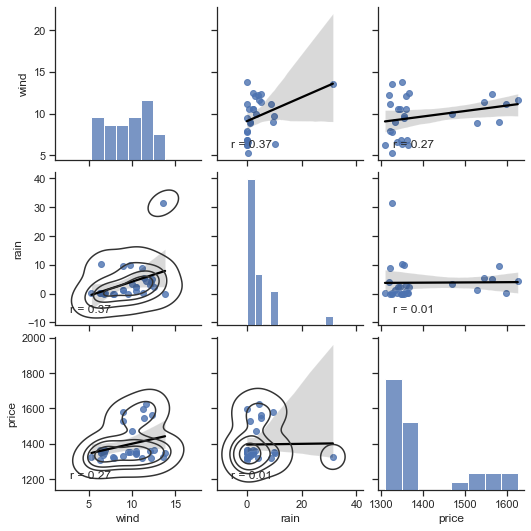

<Figure size 640x480 with 0 Axes>

In [58]:
data=pd.DataFrame(data=makeframe)

print(data)

# Make the actual pairplot
g=sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'black'}})

# Different layout, using kde lines
#g=sns.pairplot(data, kind='kde')

# Create a textmap containg the result of the r-calculation on all off-diagonal
g.map_offdiag(corrfunc)

# Add kde on lower off-diagonal
g.map_lower(sns.kdeplot, levels=5, color=".2")

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

# Save the resulting plot in a vector graphic format
g.savefig("sns_week8.png", bbox_inches='tight')